In [1]:
#Anusha Gururaja Manur
#unity id :  amanur

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function that creates the X matrix as defined for fitting our model
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i
    
    return X

# Function for predicting the response
def predict_y(x,beta):
    return np.dot(create_X(x,len(beta)-1),beta)

# Function for fitting the model
def fit_beta(df,deg):
    return np.linalg.lstsq(create_X(df.x,deg),df.y,rcond=None)[0]

# Function for computing the MSE
def mse(y,yPred):
    return np.mean((y-yPred)**2)

# Loading training, validation and test data
dfTrain = pd.read_csv('Data_Train.csv')
dfVal = pd.read_csv('Data_Val.csv')
dfTest = pd.read_csv('Data_Test.csv')

############ TRAINING A MODEL

# Fitting model
deg = 1
X = create_X(dfTrain.x,deg)
beta = fit_beta(dfTrain,deg)


# Computing training error
yPredTrain = predict_y(dfTrain.x,beta)
err = mse(dfTrain.y,yPredTrain)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Test Error = {:2.3}'.format(err))

Training Error = 0.0258
Test Error = 0.0154


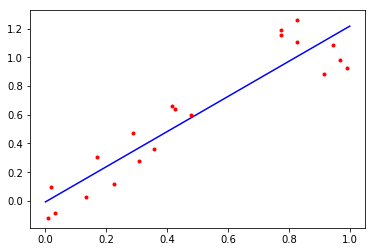

In [2]:
############ PLOTTING FITTED MODEL
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'r.')
plt.show()

Degree:  1
Training Error = 0.0258
Validation Error = 0.0249

Degree:  2
Training Error = 0.0188
Validation Error = 0.0186

Degree:  3
Training Error = 0.00967
Validation Error = 0.00843

Degree:  4
Training Error = 0.00929
Validation Error = 0.00934

Degree:  5
Training Error = 0.00902
Validation Error = 0.0109

Degree:  6
Training Error = 0.00874
Validation Error = 0.0108

Degree:  7
Training Error = 0.00873
Validation Error = 0.0109

Degree:  8
Training Error = 0.00873
Validation Error = 0.0111

Degree:  9
Training Error = 0.00823
Validation Error = 0.0152

Degree:  10
Training Error = 0.00673
Validation Error = 0.0392



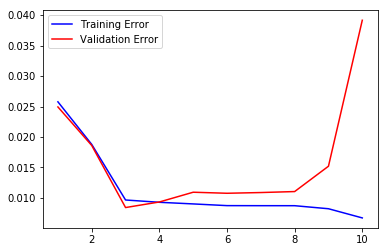

In [3]:
############ HYPER-PARAMETER TUNING

# Initializing range of degree values to be tested and errors
degRange = list(range(1,11))
errTrain = np.zeros(len(degRange))
errVal = np.zeros(len(degRange))

# Computing error as a function of degree
# ...
for i,degree in enumerate(degRange):
    beta = fit_beta(dfTrain,degree)
    print ("Degree: ", degree)

    # Computing training error
    
    yPredTrain = predict_y(dfTrain.x,beta)
    err_train = mse(dfTrain.y,yPredTrain)
    print('Training Error = {:2.3}'.format(err_train))
    errTrain[i]=err_train
    
    #beta = fit_beta(dfVal,degree)
    # Computing val error
    yPredVal = predict_y(dfVal.x,beta)
    err_val = mse(dfVal.y,yPredVal)
    print('Validation Error = {:2.3}'.format(err_val))
    errVal[i]=err_val
    print ()
    
# Plotting training and validation errors
plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.legend(('Training Error','Validation Error'))
plt.savefig('error.png')
plt.show()
plt.close()

In [5]:
############ TRAINING SELECTED MODEL

# Concatenating data training and validation data frames
df =  pd.concat([dfTrain, dfVal], ignore_index=True)

# Fit model using the optimal degree found in the previous cell

#Optimal degree is 3 as this is where the validation error starts increasing 
degOpt = 3

# Compute and print training and test errors
beta = fit_beta(df,degOpt)

# Computing training error
yPred = predict_y(df.x,beta)
err = mse(df.y,yPred)
print('Training Error = {:2.3}'.format(err))

# Computing test error
yPredTest = predict_y(dfTest.x,beta)
err = mse(dfTest.y,yPredTest)
print('Testing Error = {:2.3}'.format(err))

Training Error = 0.0087
Testing Error = 0.0108


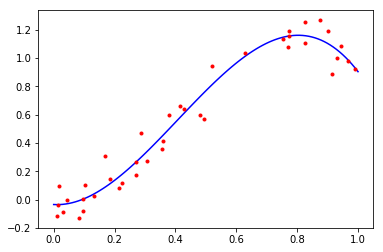

In [6]:
############ PLOTTING FITTED MODEL
# Plot the fitted model as in the second cell
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',df.x,df.y,'r.')

plt.savefig('deg3.png')
plt.show()
plt.close()